In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Live.xls')

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis = 1, inplace = True)

In [6]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:
df.drop(['status_id', 'status_published'], axis = 1, inplace = True)

In [8]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [9]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [10]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [11]:
X = df.drop(columns = 'status_type')
y = df['status_type']

In [12]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = mm.fit_transform(X)

In [13]:
X = pd.DataFrame(X, columns = df.drop(columns = 'status_type').columns)

In [14]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [15]:
from sklearn.cluster import KMeans

In [16]:
def elbow_visualizer(algorithm, data, num_clusters):

  from yellowbrick.cluster import KElbowVisualizer

  model = algorithm
  visualizer = KElbowVisualizer(model, k = (2, num_clusters))

  visualizer.fit(data)
  visualizer.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

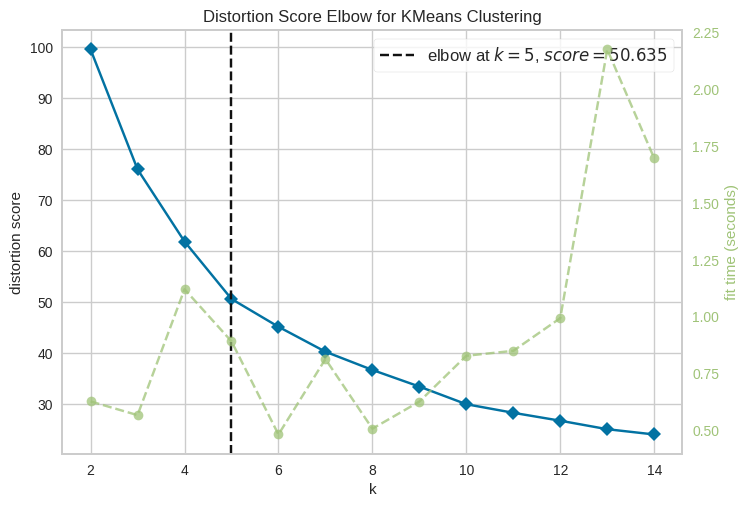

In [17]:
elbow_visualizer(KMeans(), X, 15)

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score

def silhouette(num_clusters, data):

  model = KMeans(n_clusters = num_clusters, random_state = 1).fit(data)
  cluster_labels = model.labels_

  sample_silhouette_values = silhouette_samples(data, cluster_labels)


  means_lst = []
  for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[cluster_labels == label].mean())

  return means_lst, print("Best results: silhouette score {} with {} clusters".format(max(means_lst), means_lst.index(max(means_lst))))

In [19]:
means_lst = silhouette(15, X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best results: silhouette score 0.7751538943335385 with 10 clusters


In [20]:
means_lst

([0.22081115841861348,
  0.615635273204326,
  0.2438950280629341,
  0.3196900829568167,
  0.39286537519797526,
  -0.060341161838945015,
  0.22432124261157804,
  0.4716560327238342,
  0.2780111821191804,
  0.5949318579287111,
  0.7751538943335385,
  0.262063681665904,
  0.10496489197421469,
  0.02071805875650599,
  0.18890192669283767],
 None)

In [21]:
kmeans = KMeans(n_clusters = 10, random_state = 0)

kmeans_clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
kmeans.cluster_centers_

array([[ 9.81762173e-03,  1.08971695e-03,  1.36324701e-03,
         9.44659307e-03,  1.95365533e-03,  8.68372405e-04,
         7.87056824e-04,  1.45213568e-03,  7.91932844e-04],
       [ 4.62281819e-01,  3.00418746e-03,  3.49698721e-03,
         4.61325288e-01,  3.67700072e-03,  6.92919349e-03,
         9.72175662e-04,  2.06398349e-04, -1.25767452e-17],
       [ 2.70410890e-01,  1.21138918e-01,  1.89582188e-01,
         2.18531285e-01,  3.32044050e-01,  4.38002539e-02,
         6.47433496e-02,  3.43713956e-02,  6.64136622e-02],
       [ 2.42436953e-01,  3.04287369e-03,  4.92696224e-03,
         2.40690971e-01,  7.43091906e-03,  1.06012751e-02,
         1.86422246e-03,  1.43472023e-03,  9.17912405e-04],
       [ 8.73319179e-02,  2.80417057e-01,  1.13861586e-01,
         6.79088269e-02,  1.16797005e-01,  1.23211775e-02,
         4.96376016e-02,  5.61189993e-02,  2.15053763e-02],
       [ 7.37037378e-02,  3.47466695e-03,  2.66683906e-03,
         7.17180448e-02,  1.06206287e-02,  5.541729

In [23]:
kmeans.inertia_

30.02747929426821

In [24]:
kmeans2 = KMeans(n_clusters = 5, random_state = 0)

kmeans_clusters2 = kmeans2.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
kmeans2.inertia_

50.636859067364696

In [26]:
np.unique(kmeans_clusters2)

array([0, 1, 2, 3, 4], dtype=int32)

In [27]:
#X['clusters'] = kmeans_clusters2

In [28]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [29]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [30]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [31]:
#Using Dendrogram

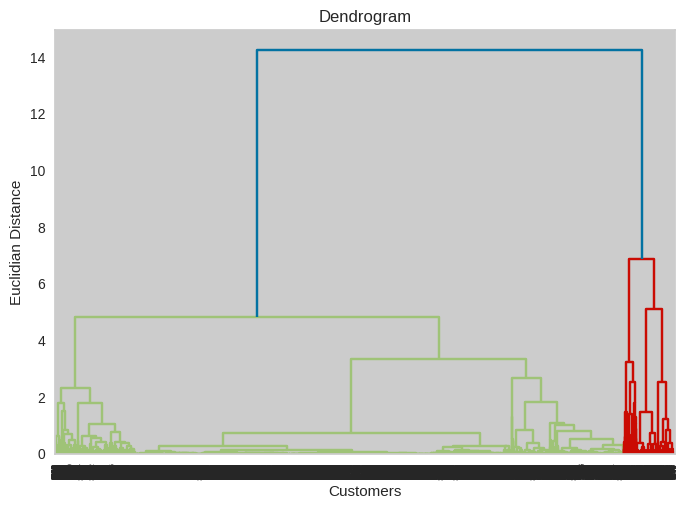

In [32]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian Distance')
plt.show()

In [33]:
agglo_model = AgglomerativeClustering(linkage = 'ward', n_clusters = 5)
agglomerative_clusters = agglo_model.fit_predict(X)

In [34]:
GaussianMixture_model = GaussianMixture(n_components = 5)
gmm_clusters = GaussianMixture_model.fit_predict(X)

In [35]:
DBSCAN_model = DBSCAN(eps = 5, min_samples= 2)
dbs_clusters = DBSCAN_model.fit_predict(X)

In [36]:
def silhouette_method(df, algo, y_pred):
  print('====================================================================================')
  print('clustering ', algo, ": silhouette score: ", silhouette_score(df, y_pred))

In [37]:
silhouette_method(X, ' : Kmeans', kmeans_clusters2)
silhouette_method(X, ' : Agglomerative', agglomerative_clusters)
silhouette_method(X, ' : GaussianMixture', gmm_clusters)
print('======================================================================================')

clustering   : Kmeans : silhouette score:  0.6961774467131181
clustering   : Agglomerative : silhouette score:  0.618409089165976
clustering   : GaussianMixture : silhouette score:  0.4304041566150829


In [38]:
### PCA

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components = 3)

pca.fit(X)
pca_samples = pca.transform(X)

In [41]:
X_pca = pd.DataFrame(pca_samples)

X_pca.head()

,0,1,2
0,0.102166,0.108707,-0.024445
1,-0.026744,-0.021502,-0.001840
2,0.000206,0.011211,-0.004789
3,-0.038197,-0.019096,-0.002186
4,-0.007369,-0.015080,-0.006273


In [42]:
means_lst = silhouette(15, X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best results: silhouette score 0.7835123238843675 with 3 clusters


In [43]:
clusterer = KMeans(n_clusters = 3, random_state = 42).fit(X_pca)

centers = clusterer.cluster_centers_

c_preds = clusterer.predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
X_pca['clusters'] = c_preds

In [46]:
import plotly as py
from plotly import graph_objects as go

In [47]:
def plot_3d_clusters(data, label1, label2, label3, clusters):

  trace1 = go.Scatter3d(
      x = data[label1],
      y = data[label2],
      z = data[label3],
      mode = 'markers',
      marker = dict(
          color = data[clusters],
          size = 10,
          line = dict(
              color = data[clusters],
              width = 12
          ),
          opacity = 0.8
      )
  )

  data = [trace1]
  layout = go.Layout(
      title = 'Clusters with PCA',
      scene = dict(
          xaxis = dict(title = label1),
          yaxis = dict(title = label2),
          zaxis = dict(title = label3)
      )
  )

  fig = go.Figure(data = data, layout = layout)
  py.offline.iplot(fig)

In [48]:
plot_3d_clusters(X_pca, 0, 1, 2, 'clusters')